In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import mlab

from scipy import signal
import h5py, time


In [2]:
%matplotlib notebook

In [3]:
import sys
sys.path.append('/home/analysis_user/New_trap_code/Tools/')
import BeadDataFile

In [4]:
##Force Calibration with single freq, with xyz2

In [7]:
for i in range(61,66):
    Ndata=i
    SigFreq=151
    #fname = r'/home/data_transfer/data_from_windows/20190805/NoBead/InitialTest/Data%d.h5' % Ndata
    fname = r"/home/data_transfer/data_from_windows/20191107/Bead1/Discharge/Discharge_%d.h5" % Ndata
    #fname = r"/home/data_transfer/data_from_windows/20190724/Bead1/TransFunc/TransFuncY_%d.h5" % Ndata
    BDF = BeadDataFile.BeadDataFile(fname)
    data = BDF.xyz2
    fsamp=5000
    res=50000
    data_det=signal.detrend(data)

    xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
    ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
    zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
    #print(np.sqrt(xpsd[SigFreq*10]))
    #print(np.sqrt(ypsd[SigFreq*10]))
    print(np.sqrt(zpsd[SigFreq*10]))
    

8545.126157718263
8655.453409523921
8558.777769120927
8733.04803023712
8785.785265309201


In [8]:
q=10

V=10
F=(q*1.602e-19)*(V*2/8.6e-3*0.65)
print(F)

2.4216279069767445e-15


In [302]:
##code for Transfer Function

In [11]:
##X preparation
NdataX=1
fname = r"/home/data_transfer/data_from_windows/20191107/Bead1/TransFunc/TransFunc_X_%d.h5" % NdataX
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz2
res=50000
data_det=signal.detrend(data)
fbase=7

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
Noise0X=np.sqrt(xpsd[fbase*10])
XnoiseX=np.sqrt(xpsd)
XnoiseY=np.sqrt(ypsd)
XnoiseZ=np.sqrt(zpsd)

No cantilever data
Error loading spinning data


In [12]:
##Y preparataion
NdataY=2 
fname = r"/home/data_transfer/data_from_windows/20191107/Bead1/TransFunc/TransFunc_Y_%d.h5" % NdataY 
BDF = BeadDataFile.BeadDataFile(fname) 
data = BDF.xyz2 
res=50000 
data_det=signal.detrend(data)

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none) 
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none) 
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none) 
Noise0Y=np.sqrt(ypsd[fbase*10]) 
YnoiseX=np.sqrt(xpsd) 
YnoiseY=np.sqrt(ypsd) 
YnoiseZ=np.sqrt(zpsd)

No cantilever data
Error loading spinning data


In [13]:
##Z preparation
NdataZ=3
fname = r"/home/data_transfer/data_from_windows/20191107/Bead1/TransFunc/TransFunc_Z_%d.h5" % NdataZ
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz2
res=50000
data_det=signal.detrend(data)

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
Noise0Z=np.sqrt(zpsd[fbase*10])
ZnoiseX=np.sqrt(xpsd)
ZnoiseY=np.sqrt(ypsd)
ZnoiseZ=np.sqrt(zpsd)

No cantilever data
Error loading spinning data


In [14]:
q=8
V=0.65
F=(q*1.602e-19)*(V*2/8.6e-3*0.65)
Nharm=100

FnoiseXX=XnoiseX/Noise0X*F
FnoiseXY=XnoiseY/Noise0Y*F
FnoiseXZ=XnoiseZ/233*7.26e-16
FnoiseYX=YnoiseX/Noise0X*F
FnoiseYY=YnoiseY/Noise0Y*F
FnoiseYZ=YnoiseZ/Noise0Z*F
FnoiseZX=ZnoiseX/Noise0X*F
FnoiseZY=ZnoiseY/Noise0Y*F
FnoiseZZ=ZnoiseZ/Noise0Z*F

TFXX=np.zeros(Nharm)
TFXY=np.zeros(Nharm)
TFXZ=np.zeros(Nharm)
TFYX=np.zeros(Nharm)
TFYY=np.zeros(Nharm)
TFYZ=np.zeros(Nharm)
TFZX=np.zeros(Nharm)
TFZY=np.zeros(Nharm)
TFZZ=np.zeros(Nharm)

FreqTF=np.zeros(Nharm)
for i in range(Nharm):
    FreqTF[i]=fbase*(i+1)
    TFXX[i]=FnoiseXX[fbase*10*(i+1)]
    TFXY[i]=FnoiseXY[fbase*10*(i+1)]
    TFXZ[i]=FnoiseXZ[fbase*10*(i+1)]
    TFYX[i]=FnoiseYX[fbase*10*(i+1)]
    TFYY[i]=FnoiseYY[fbase*10*(i+1)]
    TFYZ[i]=FnoiseYZ[fbase*10*(i+1)]
    TFZX[i]=FnoiseZX[fbase*10*(i+1)]
    TFZY[i]=FnoiseZY[fbase*10*(i+1)]
    TFZZ[i]=FnoiseZZ[fbase*10*(i+1)]

In [15]:
ofname = "/home/data_transfer/data_from_windows/20191107/Bead1/TransFunc/TFBead%d%d%d.txt" %(NdataX,NdataY,NdataZ)
f1 = open(ofname,"a")
for i in range(Nharm):
    f1.write('%f %e %e %e %e %e %e %e %e %e\n' % (FreqTF[i],TFXX[i],TFXY[i],TFXZ[i],
                                                  TFYX[i],TFYY[i],TFYZ[i],TFZX[i],TFZY[i],TFZZ[i]))
f1.close()

In [ ]:
## Plotting the force sensitivity with transfer function compensation

In [16]:
Ndata=35
#fname = r"/home/data_transfer/data_from_windows/20190902/Bead1/Discharge/Discharge_%d.h5" % Ndata
fname = r"/home/data_transfer/data_from_windows/20191107/Bead1/InitialTest/Data%d.h5" % Ndata

BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz2
res = 5000
data_det=signal.detrend(data)

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)

w0x=328.988
gx=41.1714
w0y=305.167
gy=44.8981
w0z=298.662	
gz=216.573
BtoFx=5.63E-11
BtoFy=1.21E-12
BtoFz=2.82E-19

f0=151
F0x=1/np.sqrt((f0*f0-w0x*w0x)*(f0*f0-w0x*w0x)+gx*gx*f0*f0)
F0y=1/np.sqrt((f0*f0-w0y*w0y)*(f0*f0-w0y*w0y)+gy*gy*f0*f0)
F0z=1/np.sqrt((f0*f0-w0z*w0z)*(f0*f0-w0z*w0z)+gz*gz*f0*f0)

xnsd=np.sqrt(xpsd)*BtoFx*F0x*np.sqrt((freqs*freqs-w0x*w0x)*(freqs*freqs-w0x*w0x)+gx*gx*freqs*freqs)
ynsd=np.sqrt(ypsd)*BtoFy*F0y*np.sqrt((freqs*freqs-w0y*w0y)*(freqs*freqs-w0y*w0y)+gy*gy*freqs*freqs)
znsd=np.sqrt(zpsd)*BtoFz*F0z*np.sqrt((f0*f0-w0z*w0z)*(f0*f0-w0z*w0z)+gz*gz*f0*f0)

No cantilever data


<IPython.core.display.Javascript object>


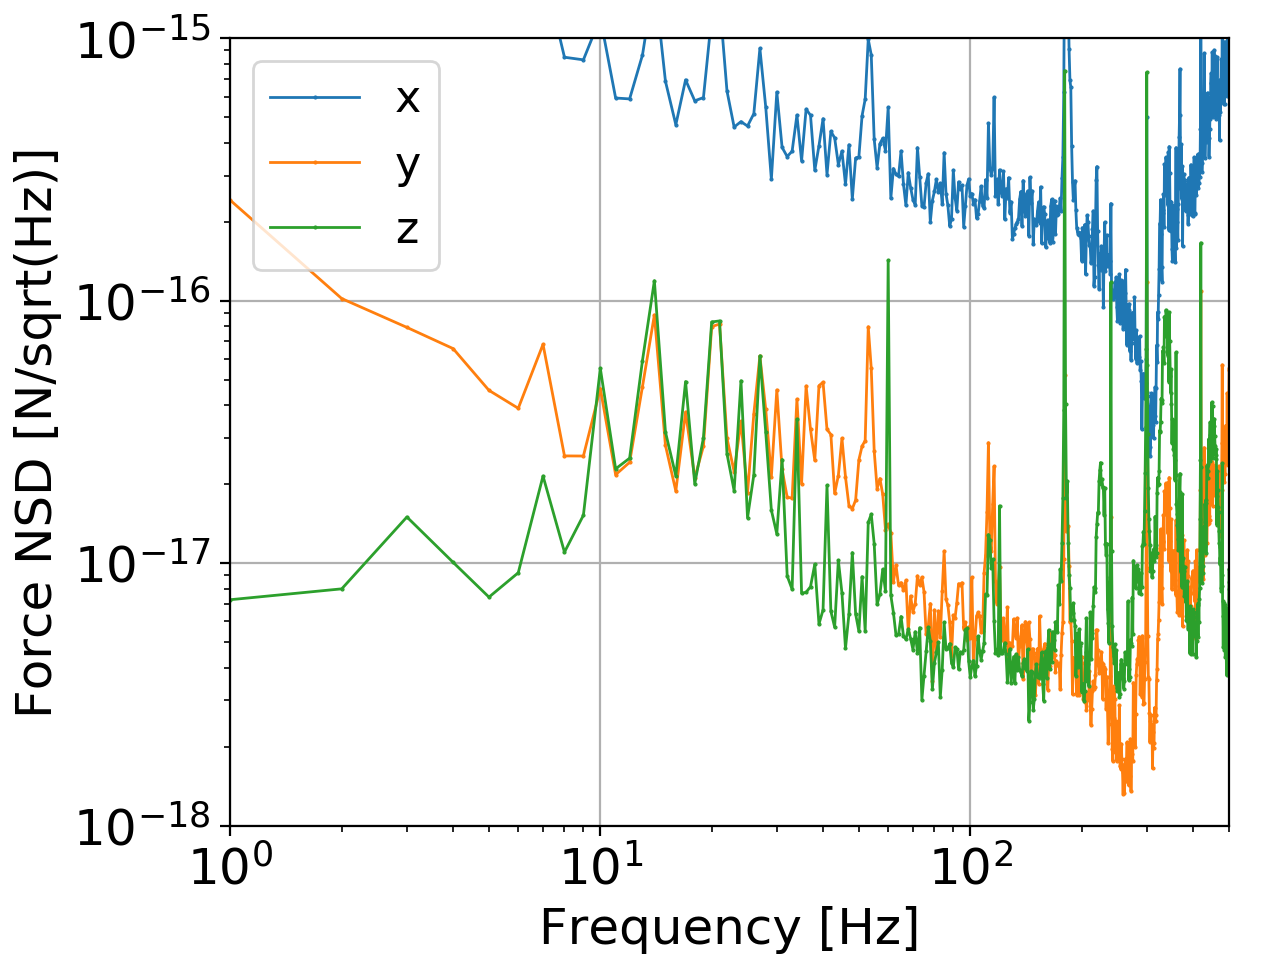

In [17]:
_,ax = plt.subplots()
plt.subplots_adjust(left=0.18, right=0.96, top=0.96, bottom=0.14)
ax.loglog(freqs, xnsd, '.-', label="x",markersize=1,linewidth=1)
ax.loglog(freqs, ynsd, '.-', label="y",markersize=1,linewidth=1)
ax.loglog(freqs, znsd, '.-', label="z",markersize=1,linewidth=1)
ax.legend(fontsize=16)
ax.set_xlabel('Frequency [Hz]', fontsize=18)
ax.set_ylabel('Force NSD [N/sqrt(Hz)]',fontsize=18)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
plt.xlim(1,500)
plt.ylim(1e-18,1e-15)
plt.grid(True)
ofname='/home/data_transfer/data_from_windows/20191107/Bead1/InitialTest/Data%d.png' % Ndata

plt.savefig(ofname,dpi=300)

In [73]:
##Noise Spectrum with phase, output to text file

In [75]:
Ndata=22
fname = r"/home/data_transfer/data_from_windows/20190813/Bead1/InitialTest/Data%d.h5" % Ndata

BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz2
res = 50000
data_det=signal.detrend(data)

freqs=np.linspace(0,2500,(res/2)+1)
    
xFFT=np.fft.rfft(x_1000)
yFFT=np.fft.rfft(y_1000)
zFFT=np.fft.rfft(z_1000)
norm = np.sqrt(2 / (res* fsamp))
xpsd = norm**2 * (xFFT * xFFT.conj()).real
ypsd = norm**2 * (yFFT * yFFT.conj()).real
zpsd = norm**2 * (zFFT * zFFT.conj()).real
  
w0x=330.846
gx=72.6684
w0y=303.878
gy=57.7632
w0z=299.228	
gz=209.043
BtoFx=7.71E-12
BtoFy=1.35E-12
BtoFz=2.54E-19


f0=151
F0x=1/np.sqrt((f0*f0-w0x*w0x)*(f0*f0-w0x*w0x)+gx*gx*f0*f0)
F0y=1/np.sqrt((f0*f0-w0y*w0y)*(f0*f0-w0y*w0y)+gy*gy*f0*f0)
F0z=1/np.sqrt((f0*f0-w0z*w0z)*(f0*f0-w0z*w0z)+gz*gz*f0*f0)

F=2.42e-16
    
xnsd=np.sqrt(xpsd)*BtoFx*F0x*np.sqrt((freqs*freqs-w0x*w0x)*(freqs*freqs-w0x*w0x)+gx*gx*freqs*freqs)
ynsd=np.sqrt(ypsd)*BtoFy*F0y*np.sqrt((freqs*freqs-w0y*w0y)*(freqs*freqs-w0y*w0y)+gy*gy*freqs*freqs)
znsd=np.sqrt(zpsd)*BtoFz*F0z*np.sqrt((f0*f0-w0z*w0z)*(f0*f0-w0z*w0z)+gz*gz*f0*f0)
    
xphase=np.angle(xFFT)
yphase=np.angle(yFFT)
zphase=np.angle(zFFT)
ofname = "../../Results/AkioK/ForceSensitivity%dXYZ2.txt" % Ndata

f1 = open(ofname,"a")
for i in range(0,25001):
    f1.write('%f %e %e %e %e %e %e\n' % (freqs[i], xnsd[i],ynsd[i],znsd[i],xphase[i],yphase[i],zphase[i]))
f1.close()

No cantilever data


/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


In [20]:
#analyzing multiple data in single number
Nint=2
Nave=3
Ndata=3
for k in range(0,1000):
    NSubData=k
    fname = r'/home/data_transfer/data_from_windows/20191107/Bead1/Shaking/Shaking%d_%d.h5' % (Ndata,NSubData)
    BDF = BeadDataFile.BeadDataFile(fname)
    data = BDF.xyz2
    fsamp=5000
    res=50000

    data_det=signal.detrend(data)
    x_1000=data_det[0]
    y_1000=data_det[1]
    z_1000=data_det[2]
    freqs=np.linspace(0,2500,(res/2)+1)
    
    xFFT=np.fft.rfft(x_1000)
    yFFT=np.fft.rfft(y_1000)
    zFFT=np.fft.rfft(z_1000)
    norm = np.sqrt(2 / (res* fsamp))
    xpsd = norm**2 * (xFFT * xFFT.conj()).real
    ypsd = norm**2 * (yFFT * yFFT.conj()).real
    zpsd = norm**2 * (zFFT * zFFT.conj()).real
  
    w0x=328.988
    gx=41.1714
    w0y=305.167
    gy=44.8981
    w0z=298.662	
    gz=216.573
    BtoFx=5.63E-11
    BtoFy=1.21E-12
    BtoFz=2.82E-19


    f0=151
    F0x=1/np.sqrt((f0*f0-w0x*w0x)*(f0*f0-w0x*w0x)+gx*gx*f0*f0)
    F0y=1/np.sqrt((f0*f0-w0y*w0y)*(f0*f0-w0y*w0y)+gy*gy*f0*f0)
    F0z=1/np.sqrt((f0*f0-w0z*w0z)*(f0*f0-w0z*w0z)+gz*gz*f0*f0)

    xnsd=np.sqrt(xpsd)*BtoFx*F0x*np.sqrt((freqs*freqs-w0x*w0x)*(freqs*freqs-w0x*w0x)+gx*gx*freqs*freqs)
    ynsd=np.sqrt(ypsd)*BtoFy*F0y*np.sqrt((freqs*freqs-w0y*w0y)*(freqs*freqs-w0y*w0y)+gy*gy*freqs*freqs)
    znsd=np.sqrt(zpsd)*BtoFz*F0z*np.sqrt((f0*f0-w0z*w0z)*(f0*f0-w0z*w0z)+gz*gz*f0*f0)

    
    xphase=np.arctan(xFFT.imag/xFFT.real)
    yphase=np.arctan(yFFT.imag/yFFT.real)
    zphase=np.arctan(zFFT.imag/zFFT.real)
    
    ofname = "/home/data_transfer/data_from_windows/20191107/Bead1/Shaking/ShakeNSDPhase%d_%d.txt" % (Ndata,NSubData)
    Fshake=13
    f1 = open(ofname,"a")
    
    for i in range(1,int(fsamp/2/Fshake)+1):
        Intx=xFFT[Fshake*10*i]
        IntNSDx=xnsd[Fshake*10*i]
        Inty=yFFT[Fshake*10*i]
        IntNSDy=ynsd[Fshake*10*i]
        Intz=zFFT[Fshake*10*i]
        IntNSDz=znsd[Fshake*10*i]

        for j in range(1,(Nint)):
            Intx+=xFFT[Fshake*10*i+j]+xFFT[Fshake*10*i-j]
            IntNSDx+=xnsd[Fshake*10*i+j]+xnsd[Fshake*10*i-j]
            Inty+=yFFT[Fshake*10*i+j]+yFFT[Fshake*10*i-j]
            IntNSDy+=ynsd[Fshake*10*i+j]+ynsd[Fshake*10*i-j]
            Intz+=zFFT[Fshake*10*i+j]+zFFT[Fshake*10*i-j]
            IntNSDz+=znsd[Fshake*10*i+j]+znsd[Fshake*10*i-j]

        SumNoiseX=0
        SumNoiseY=0
        SumNoiseZ=0
        for j in range(Nint+1,Nave+1+Nint):
            SumNoiseX+=(xnsd[Fshake*10*i+j]+xnsd[Fshake*10*i-j])
            SumNoiseY+=(ynsd[Fshake*10*i+j]+ynsd[Fshake*10*i-j])
            SumNoiseZ+=(znsd[Fshake*10*i+j]+znsd[Fshake*10*i-j])
        AveNoiseX=0#SumNoiseX/(Nave*2)
        AveNoiseY=0#SumNoiseY/(Nave*2)
        AveNoiseZ=0#SumNoiseZ/(Nave*2)
        SigAmpX=IntNSDx-AveNoiseX*(Nint*2+1)
        SigPhaX=np.angle(Intx) 
        SigAmpY=IntNSDy-AveNoiseY*(Nint*2+1)
        SigPhaY=np.angle(Inty) 
        SigAmpZ=IntNSDz-AveNoiseZ*(Nint*2+1)
        SigPhaZ=np.angle(Intz) 
        
        f1.write('%f %e %e %e %e %e %e\n' % (Fshake*i, SigAmpX, SigAmpY, SigAmpZ, SigPhaX, SigPhaY, SigPhaZ))
    f1.close()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


In [32]:
##Extracting Cantilever Position Data for y

In [44]:
for j in range(0,200):
    Ndata=4
    FileN=j
    fname = r'/home/data_transfer/data_from_windows/20191024/Bead1/Shaking/Shaking%d_%d.h5' % (Ndata,FileN)
    BDF = BeadDataFile.BeadDataFile(fname)
    data=BDF.cant_pos
    ofname = "../../Results/AkioK/CantPosY%d_%d.txt" % (Ndata,FileN)
    f1 = open(ofname,"a")
    for i in  range(0,50000):
        f1.write('%f\n' % data[1][i])
    f1.close()

In [71]:
##Extracting QPD sum information

In [87]:
for j in range(26,45):
    Ndata=j
    fname = r'/home/data_transfer/data_from_windows/20190902/Bead1/Shaking/BeamProfile%d_0.h5' % Ndata
    BDF = BeadDataFile.BeadDataFile(fname)
    data=BDF.quad_sum
    ofname = "../../Results/AkioK/BeamProfile%dQuadSumY.txt" % Ndata
    f1 = open(ofname,"a")
    for i in  range(0,50000):
        f1.write('%d\n' % data[i])
    f1.close()

In [ ]:
##FFT for the theoretical force

In [ ]:
Ndata=1
fname = r'/home/analysis_user/Results/AkioK/ft_10um_1.txt'


fsamp=5000
res=50000
data_det=signal.detrend(data)

    data_det=signal.detrend(data)
    freqs=np.linspace(0,2500,(res/2)+1)
    
    xFFT=np.fft.rfft(data_det)
    norm = np.sqrt(2 / (res* fsamp))
    xpsd = norm**2 * (xFFT * xFFT.conj()).real
    
    xphase=np.arctan(xFFT.imag/xFFT.real)


In [69]:
#f=open("/home/analysis_user/Results/AkioK/ft_10um_1.txt", "r")
with open("/home/analysis_user/Results/AkioK/ft_10um_1.txt", "r") as file1:
    Fread = [float(i) for line in file1 for i in line.split('\n') if i.strip()]

fsamp=5000
res=50000
data_det=signal.detrend(Fread)
Fx=data_det*1e-15
freqs=np.linspace(0,2500,(res/2)+1)

xFFT=np.fft.rfft(Fx)
norm = np.sqrt(2 / (res* fsamp))
xpsd = norm**2 * (xFFT * xFFT.conj()).real
xnsd = np.sqrt(xpsd)
xphase=np.angle(xFFT)


/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


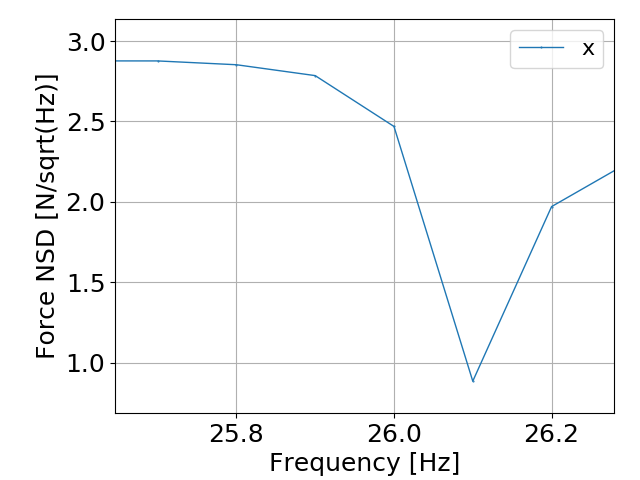

In [70]:
_,ax = plt.subplots()
plt.subplots_adjust(left=0.18, right=0.96, top=0.96, bottom=0.14)
ax.plot(freqs, xphase, '.-', label="x",markersize=1,linewidth=1)
ax.legend(fontsize=16)
ax.set_xlabel('Frequency [Hz]', fontsize=18)
ax.set_ylabel('Force NSD [N/sqrt(Hz)]',fontsize=18)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
plt.xlim(1,1000)
#plt.ylim(1e-18,1e-15)
plt.grid(True)
ofname='../../Results/AkioK/ForceSensitivity%d.png' % Ndata

#plt.savefig(ofname,dpi=300)

In [ ]:
_,ax = plt.subplots()
plt.subplots_adjust(left=0.18, right=0.96, top=0.96, bottom=0.14)
ax.loglog(freqs, xnsd, '.-', label="x",markersize=1,linewidth=1)
ax.legend(fontsize=16)
ax.set_xlabel('Frequency [Hz]', fontsize=18)
ax.set_ylabel('Force NSD [N/sqrt(Hz)]',fontsize=18)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
plt.xlim(1,1000)
#plt.ylim(1e-18,1e-15)
plt.grid(True)
ofname='../../Results/AkioK/ForceSensitivity%d.png' % Ndata